In [141]:
import numpy as np
import matplotlib.pyplot as plt

In [156]:
def plot_path():
    xs = [x[perm[i]] for i in range(n)]
    ys = [y[perm[i]] for i in range(n)]
    xs.append(x[perm[0]])
    ys.append(y[perm[0]])
    plt.plot(xs, ys, marker='s', markerfacecolor='red')
    plt.show()

In [157]:
def generate_numbers(left, right):
    return [np.random.uniform(left, right) for _ in range(20)]

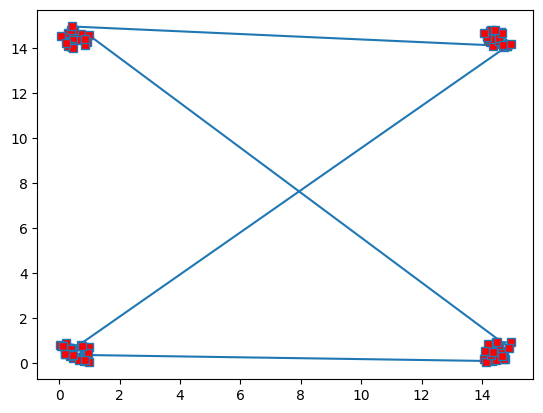

In [158]:
n = 80
x = []
y = []
intervals = [(0, 1, 0, 1), (14, 15, 0, 1), (0, 1, 14, 15), (14, 15, 14, 15)]
for a,b,c,d in intervals:
    x += generate_numbers(a, b)
    y += generate_numbers(c, d)

perm = [i for i in range(n)]
plot_path()

In [151]:
def euclid_dist(x1, x2, y1, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [152]:
dist_matrix = [[euclid_dist(x[i], x[j], y[i], y[j]) for i in range(n)] for j in range(n)]

In [153]:
def calculate_energy(new_perm):
    energy = 0
    for i in range(1, n):
        energy += dist_matrix[new_perm[i]][new_perm[i-1]]
    energy += dist_matrix[new_perm[-1]][new_perm[0]]
    return energy

In [154]:
def generate_neighbor(p):
    a = np.random.randint(0, n - 1)
    b = np.random.randint(a + 1, n)
    new_p = p[:]
    new_p[a], new_p[b] = new_p[b], new_p[a]
    return new_p


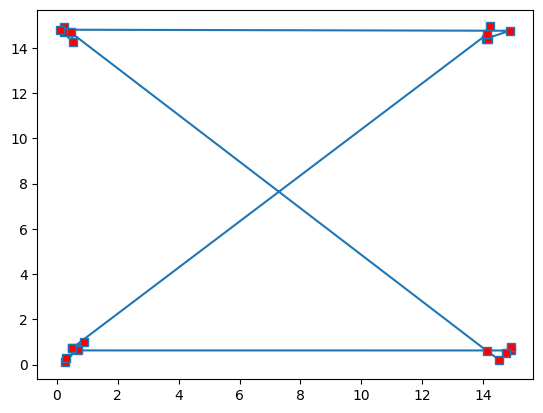

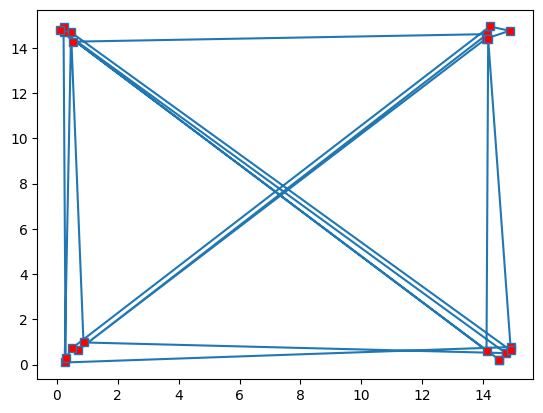

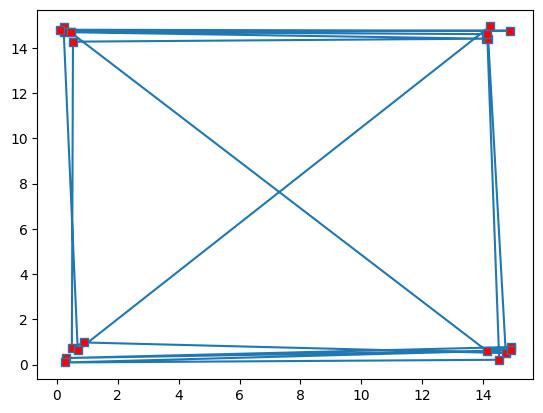

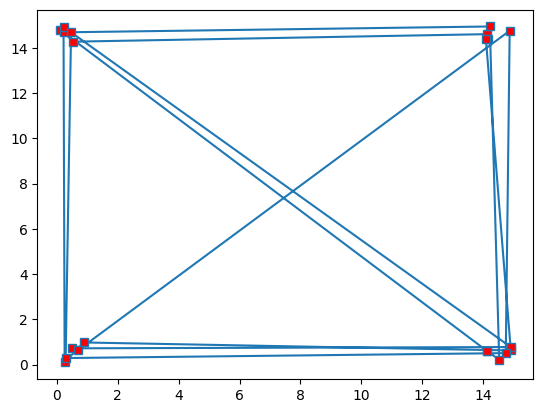

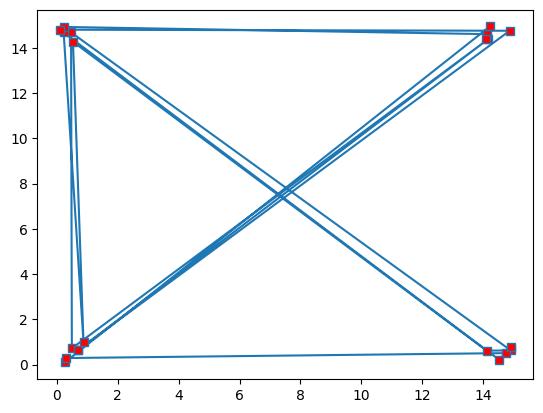

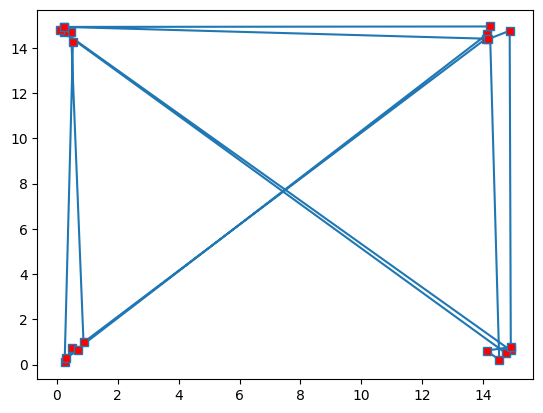

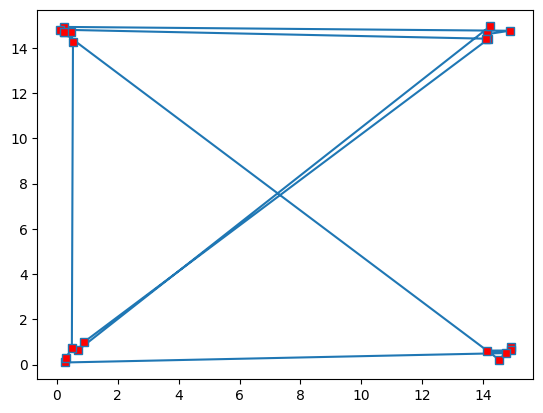

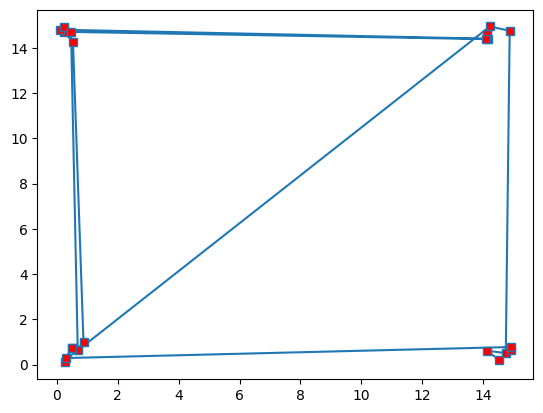

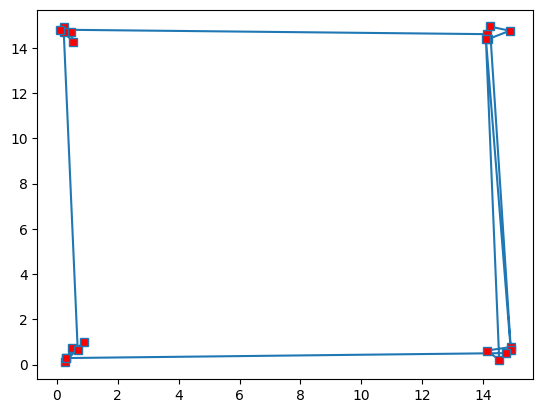

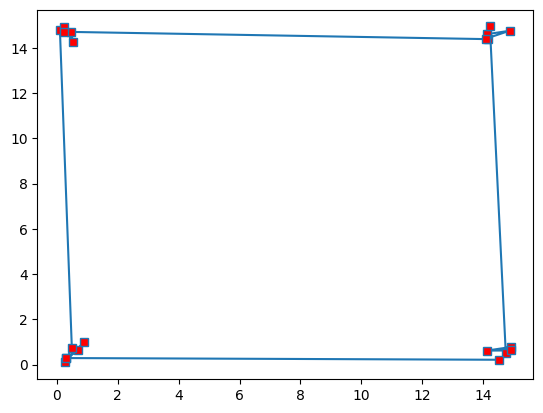

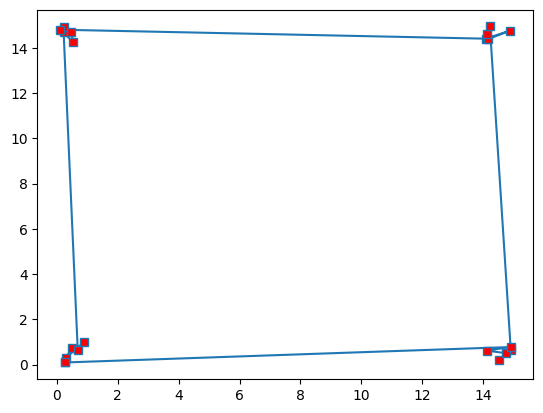

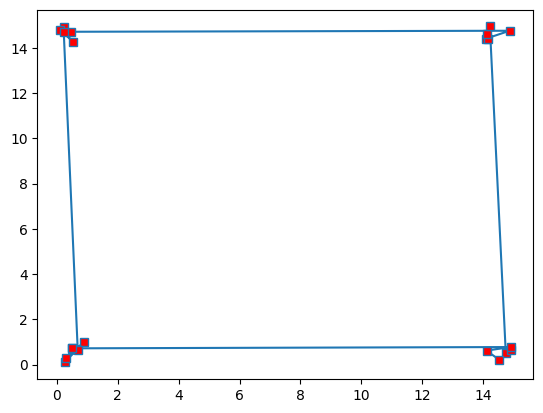

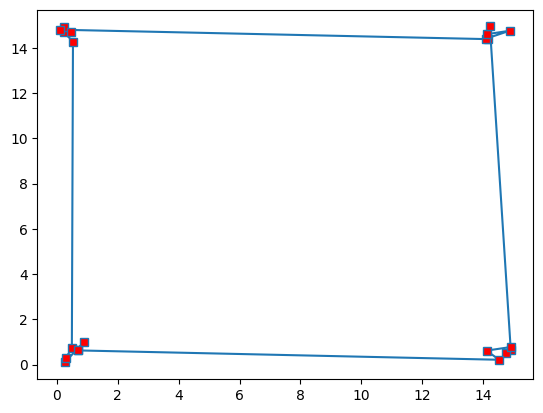

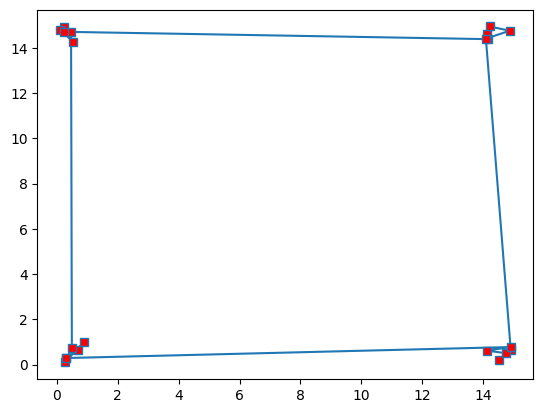

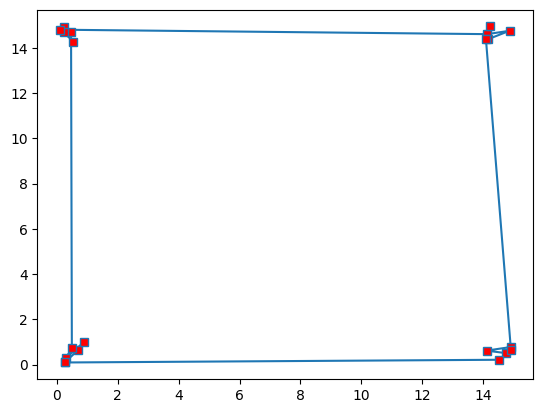

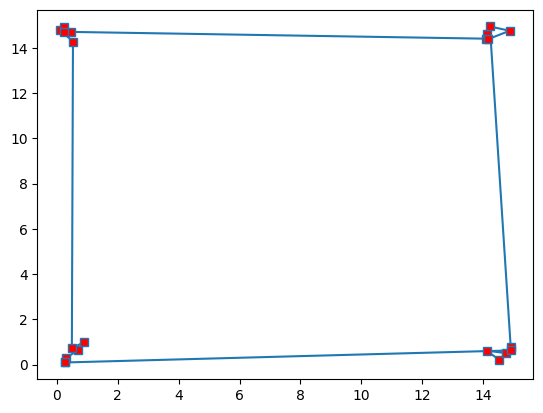

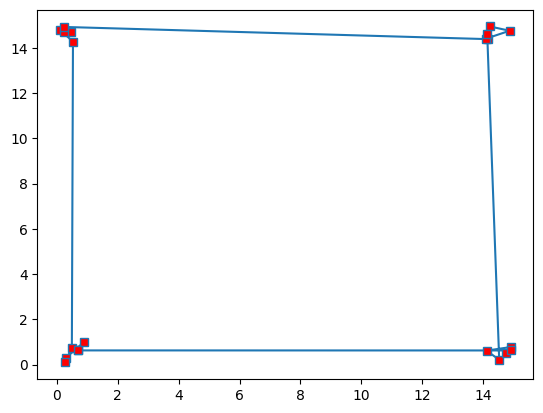

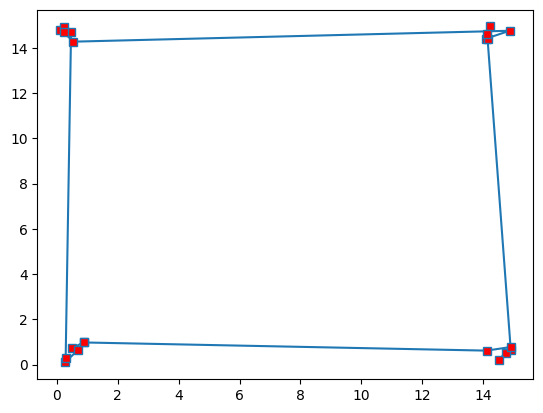

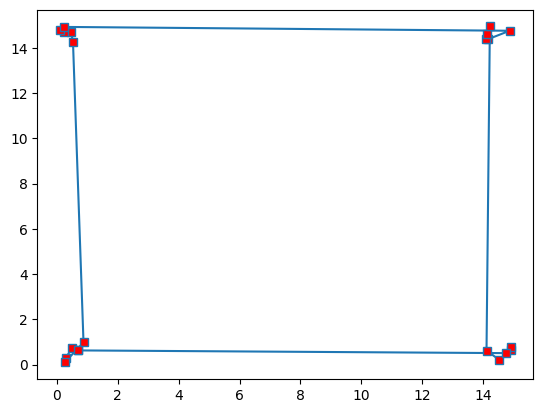

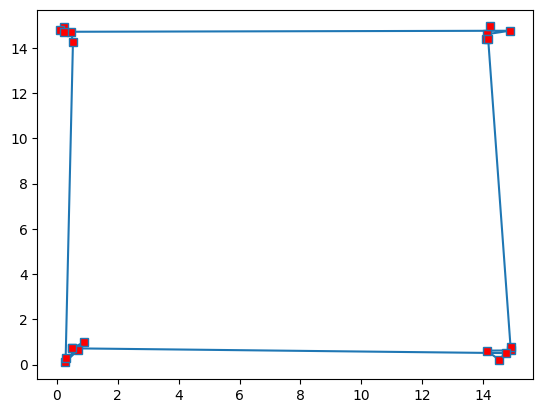

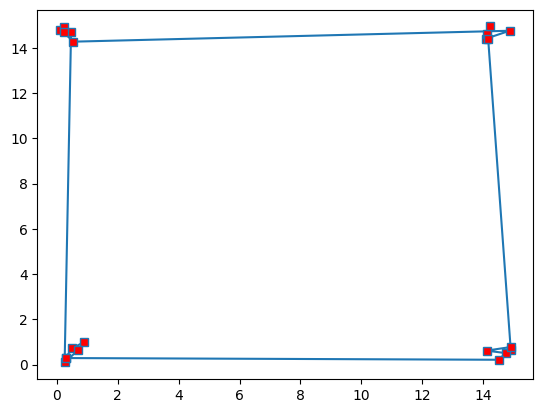

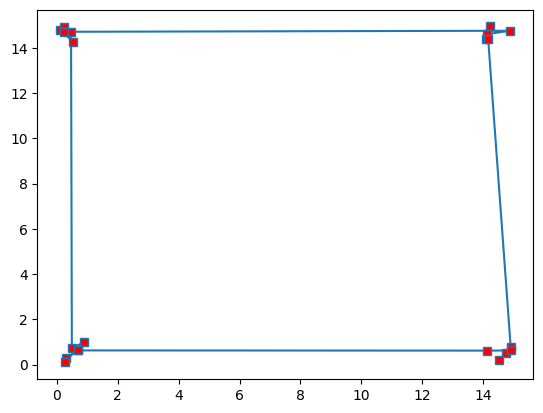

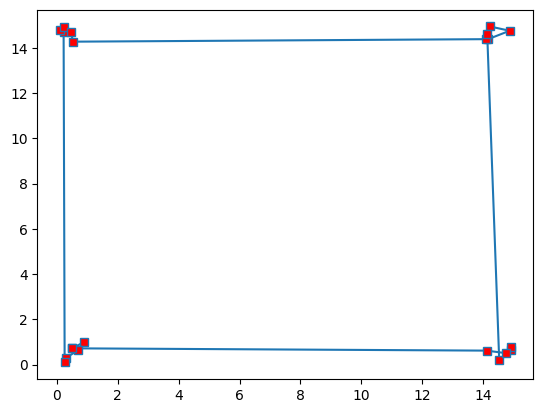

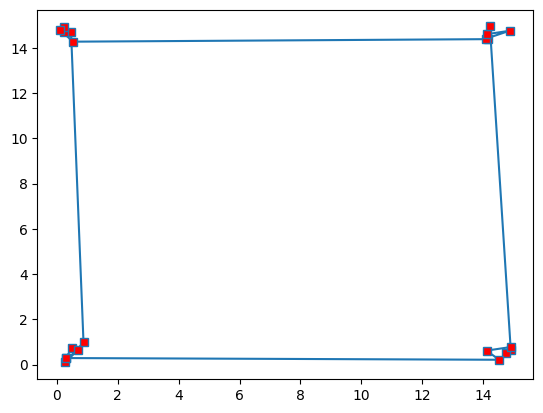

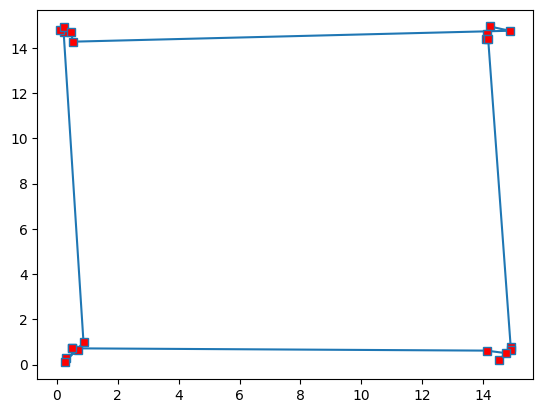

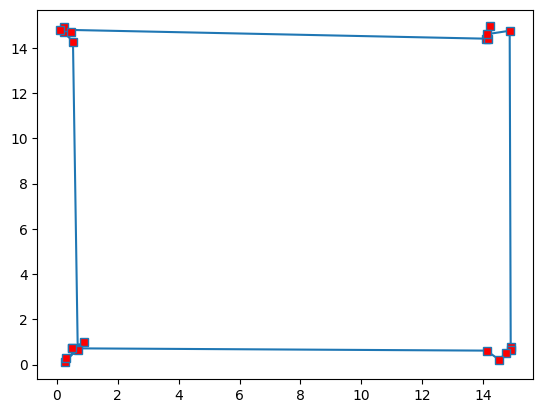

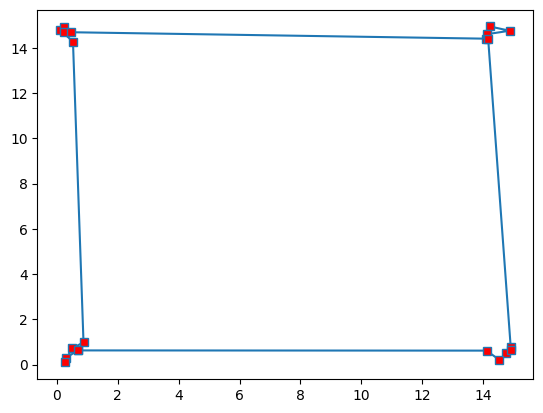

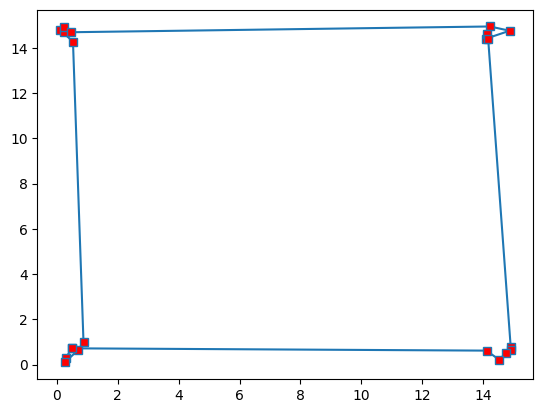

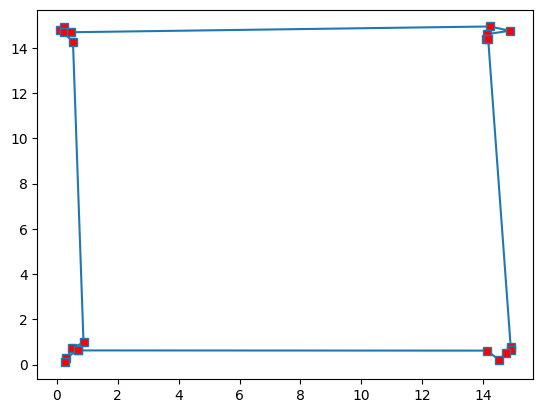

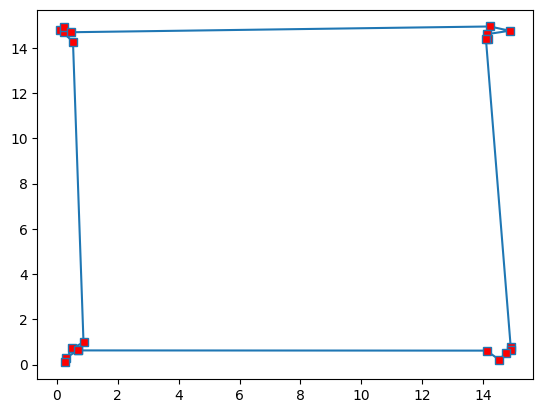

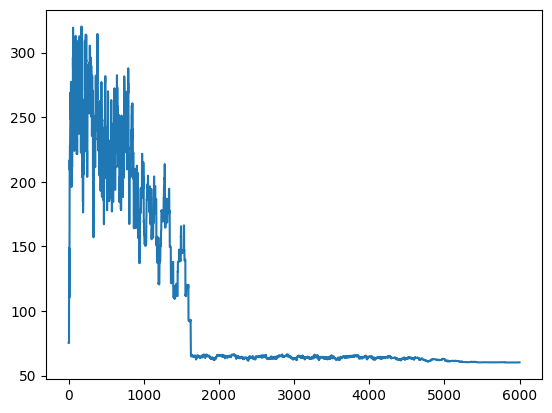

In [155]:
alpha = 0.999
T0 = 10
T = T0
cur_energy = calculate_energy(perm)

energy_states = [cur_energy]
for i in range(6000):
    new_state = generate_neighbor(perm)
    next_energy = calculate_energy(new_state)
    if next_energy < cur_energy:
        perm = new_state
        cur_energy = next_energy
    else:
        p1 = np.exp(-(next_energy - cur_energy) / T)
        if p1 > np.random.uniform(0, 0.02):
            perm = new_state
            cur_energy = next_energy
    T = T*alpha
    energy_states.append(cur_energy)
    if i % 200 == 0:
        plot_path()

plt.plot([i for i in range(6001)], energy_states)